In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_folder =  "C:/Users/Thomas Berger/Documents/EPFL/MA2/DataViz/Project_Perso/Data/"
#files = os.listdir(data_folder)

circuits_df                 = pd.read_csv(data_folder + 'circuits.csv')
constructors_df             = pd.read_csv(data_folder + 'constructors.csv')
constructor_results_df      = pd.read_csv(data_folder + 'constructor_results.csv')
constructor_standings_df    = pd.read_csv(data_folder + 'constructor_standings.csv')
drivers_df                  = pd.read_csv(data_folder + 'drivers.csv')
driver_standings_df         = pd.read_csv(data_folder + 'driver_standings.csv')
lap_times_df                = pd.read_csv(data_folder + 'lap_times.csv')
pit_stops_df                = pd.read_csv(data_folder + 'pit_stops.csv')
qualifying_df               = pd.read_csv(data_folder + 'qualifying.csv')
races_df                    = pd.read_csv(data_folder + 'races.csv')
results_df                  = pd.read_csv(data_folder + 'results.csv')
seasons_df                  = pd.read_csv(data_folder + 'seasons.csv')
status_df                   = pd.read_csv(data_folder + 'status.csv')

In [3]:
drivers_df[drivers_df['surname']=='Verstappen']

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
49,50,verstappen,\N,\N,Jos,Verstappen,1972-03-04,Dutch,http://en.wikipedia.org/wiki/Jos_Verstappen
829,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen


In [4]:
lap_times_df['time']= pd.to_datetime(lap_times_df['milliseconds'],unit='ms')

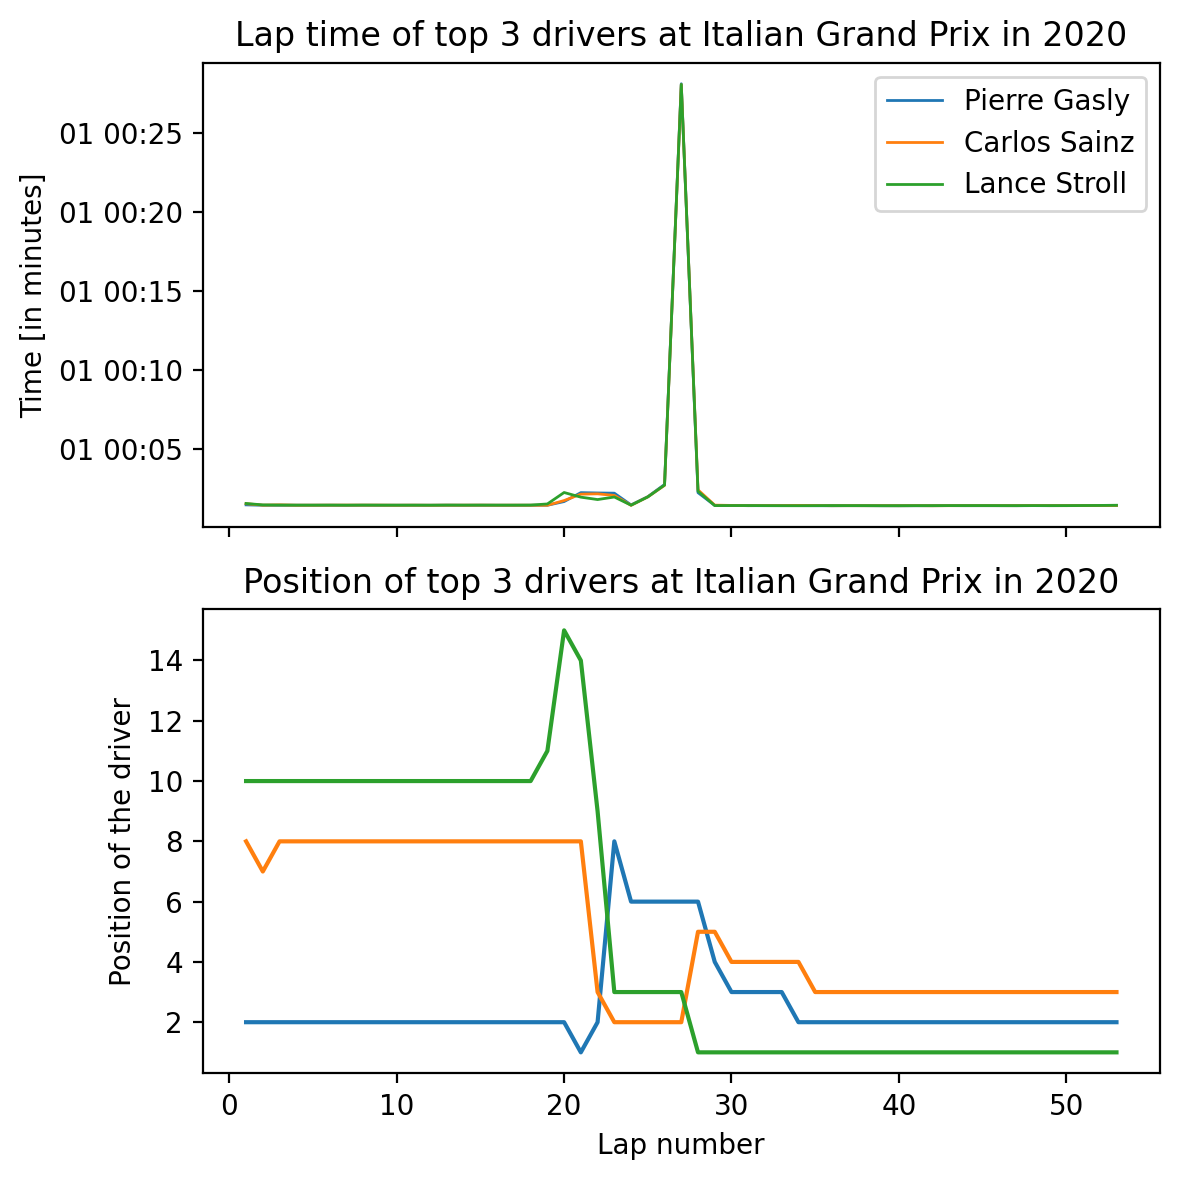

In [5]:
circuit = 'Monza'
circuitId = circuits_df['circuitId'][circuits_df['location']==circuit].iloc[0]
year = 2020
raceId = races_df['raceId'][(races_df['circuitId'] == circuitId) & (races_df['year'] == year)].iloc[0]
drivers = lap_times_df['driverId'][(lap_times_df['raceId'] == raceId) & (lap_times_df['lap'] == max(lap_times_df['lap'][lap_times_df['raceId']==raceId])) & (lap_times_df['position'] <= 3)]
drivers_names = drivers_df['forename'][drivers_df['driverId'].isin(drivers)] + ' ' + drivers_df['surname'][drivers_df['driverId'].isin(drivers)]

fig, ax = plt.subplots(2, 1, figsize=(6,6),sharex=True)

for j,i in enumerate(drivers):
    pos = lap_times_df['position'][(lap_times_df['driverId'] == i) & (lap_times_df['raceId'] == raceId)]
    time = lap_times_df['time'][(lap_times_df['driverId'] == i) & (lap_times_df['raceId'] == raceId)]
    lap = lap_times_df['lap'][(lap_times_df['driverId'] == i) & (lap_times_df['raceId'] == raceId)]
    ax[0].plot(lap,time,linewidth=1, label=drivers_names.iloc[j])
    ax[1].plot(lap,pos)

ax[0].legend()
ax[0].set_title('Lap time of top 3 drivers at %s in %d' % (races_df['name'][races_df['raceId']==raceId].values[0],races_df['year'][races_df['raceId']==raceId]) )
ax[1].set_title('Position of top 3 drivers at %s in %d' % (races_df['name'][races_df['raceId']==raceId].values[0],races_df['year'][races_df['raceId']==raceId]) )
ax[1].set_xlabel("Lap number")
ax[0].set_ylabel("Time [in minutes]")
ax[1].set_ylabel("Position of the driver")
plt.tight_layout()

In [6]:
circuit = 'Clermont-Ferrand'
circuitId = circuits_df['circuitId'][circuits_df['location']==circuit].iloc[0]
raceId = races_df['raceId'][(races_df['circuitId'] == circuitId)].iloc[0]
results = results_df[results_df['raceId']==raceId]
drivers = drivers_df['surname'][drivers_df['driverId'].isin(results['driverId'])].iloc[0:3]
print(drivers)

181        Lauda
198    Reutemann
220    Depailler
Name: surname, dtype: object


Text(0, 0.5, 'Number of races')

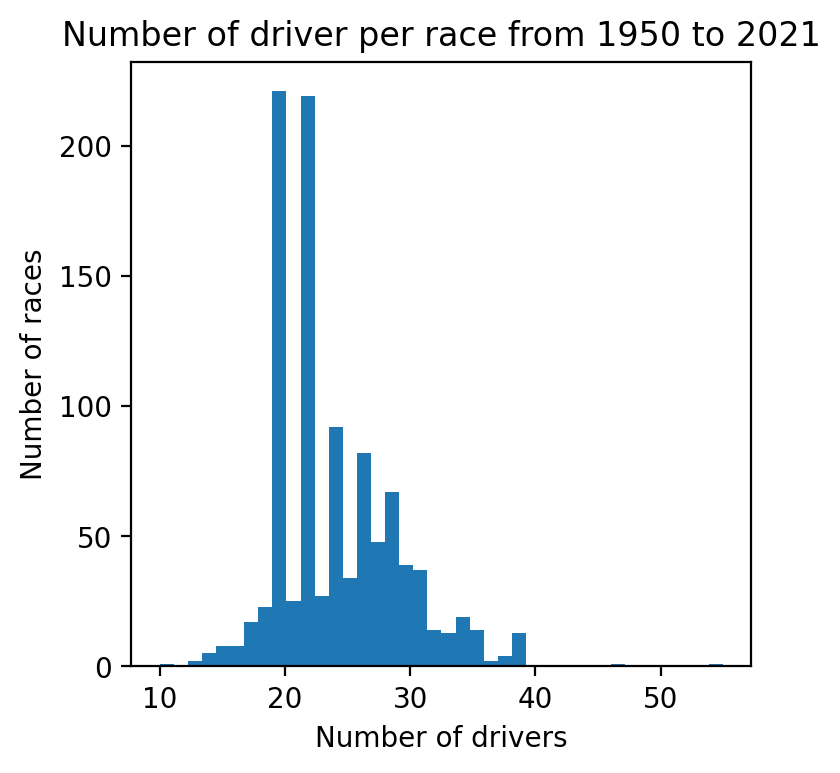

In [7]:
plt.hist(results_df.groupby('raceId').agg('count').iloc[:,0],bins=40)
plt.title("Number of driver per race from 1950 to 2021")
plt.xlabel("Number of drivers")
plt.ylabel("Number of races")

Text(0.5, 0, 'Year')

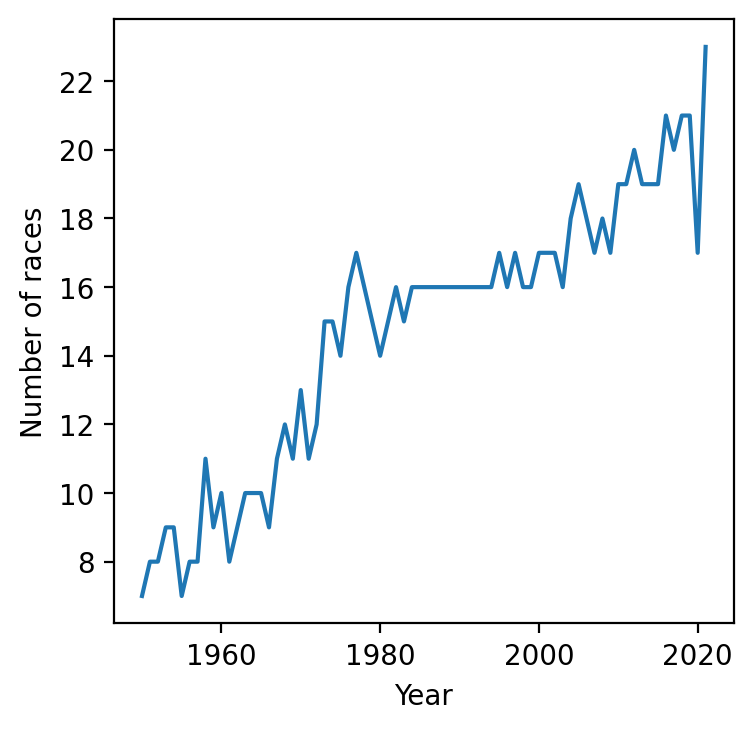

In [8]:
agg_races = races_df.groupby('year').agg('count')

plt.plot(agg_races.index,agg_races.iloc[:,0])
plt.ylabel("Number of races")
plt.xlabel("Year")


Text(0.5, 0, 'Year (2021 is low because just started)')

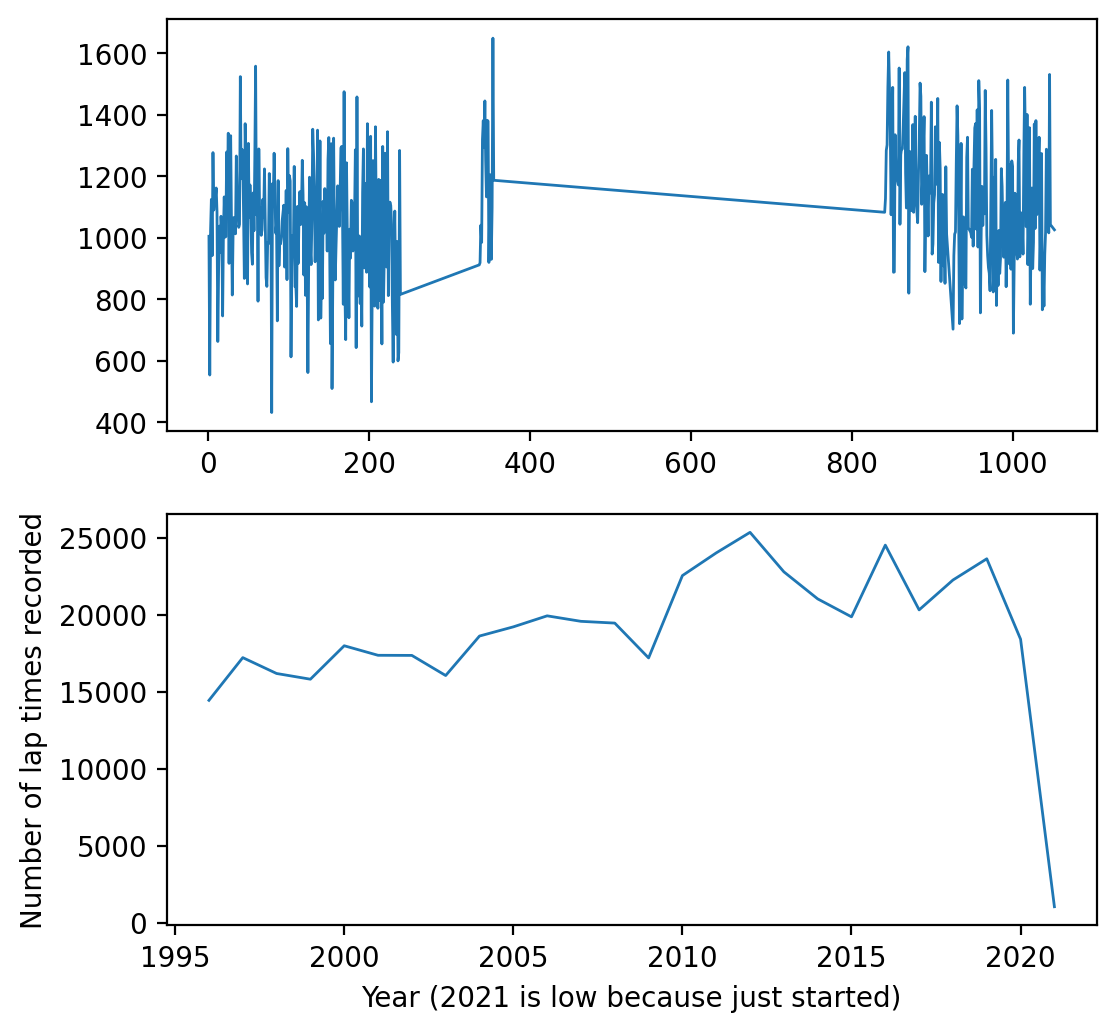

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(6,6))

agg_laps = lap_times_df.groupby('raceId').agg('count')

ax[0].plot(agg_laps.index,agg_laps.iloc[:,0],lw=1)
ax[1].set_ylabel("Number of lap times recorded")
ax[1].set_xlabel("RaceId /!\ Race id is not linear in time")

agg_laps = agg_laps.join(races_df.set_index('raceId'),'raceId', how='left', lsuffix='_left', rsuffix='_right')
agg_laps = agg_laps.groupby('year').agg('sum')

ax[1].plot(agg_laps.index,agg_laps.iloc[:,0],lw=1)
ax[1].set_ylabel("Number of lap times recorded")
ax[1].set_xlabel("Year (2021 is low because just started)")

Text(0.5, 0, 'Year (2021 is low because just started)')

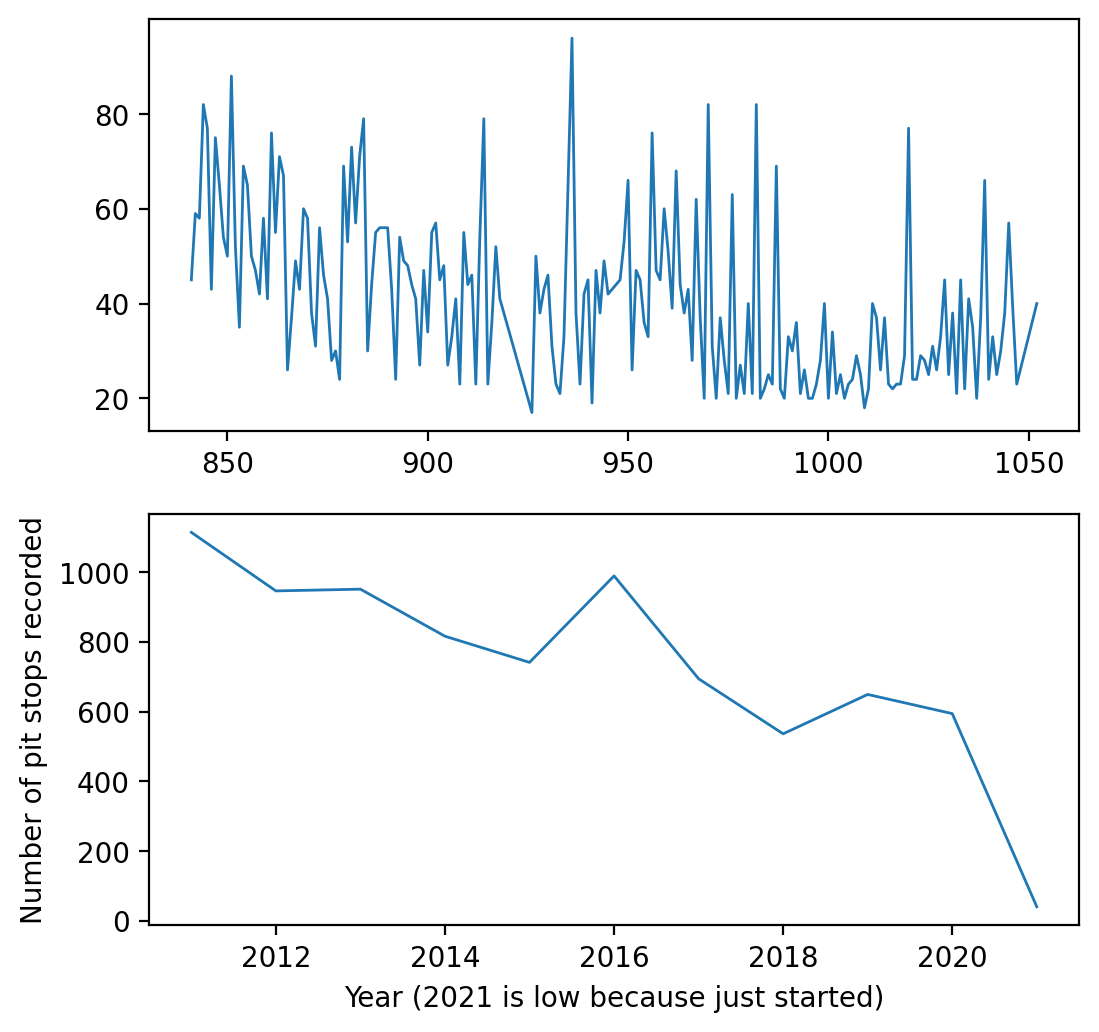

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(6,6))

agg_pits = pit_stops_df.groupby('raceId').agg('count')

ax[0].plot(agg_pits.index,agg_pits.iloc[:,0],lw=1)
ax[1].set_ylabel("Number of pit stops recorded")
ax[1].set_xlabel("RaceId /!\ Race id is not linear in time")

agg_pits = agg_pits.join(races_df.set_index('raceId'),'raceId', how='left', lsuffix='_left', rsuffix='_right')
agg_pits = agg_pits.groupby('year').agg('sum')

ax[1].plot(agg_pits.index,agg_pits.iloc[:,0],lw=1)
ax[1].set_ylabel("Number of pit stops recorded")
ax[1].set_xlabel("Year (2021 is low because just started)")

Text(0.5, 0, 'Year (2021 is low because just started)')

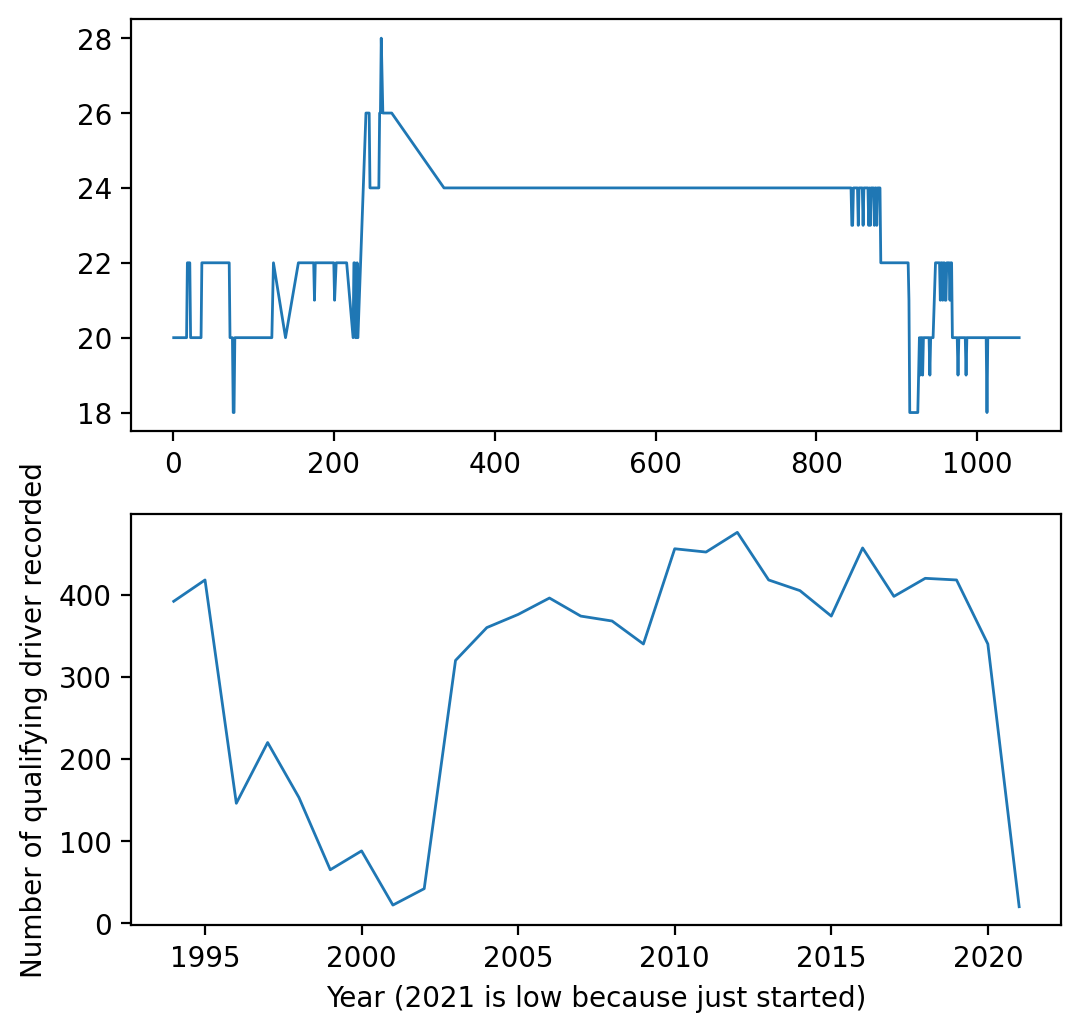

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(6,6))

agg_qual = qualifying_df.groupby('raceId').agg('count')

ax[0].plot(agg_qual.index,agg_qual.iloc[:,0],lw=1)
ax[1].set_ylabel("Number of qualifying driver recorded")
ax[1].set_xlabel("RaceId /!\ Race id is not linear in time")

agg_qual = agg_qual.join(races_df.set_index('raceId'),'raceId', how='left', lsuffix='_left', rsuffix='_right')
agg_qual = agg_qual.groupby('year').agg('sum')

ax[1].plot(agg_qual.index,agg_qual.iloc[:,0],lw=1)
ax[1].set_ylabel("Number of qualifying driver recorded")
ax[1].set_xlabel("Year (2021 is low because just started)")

Text(0.5, 0, 'Year (2021 is low because just started)')

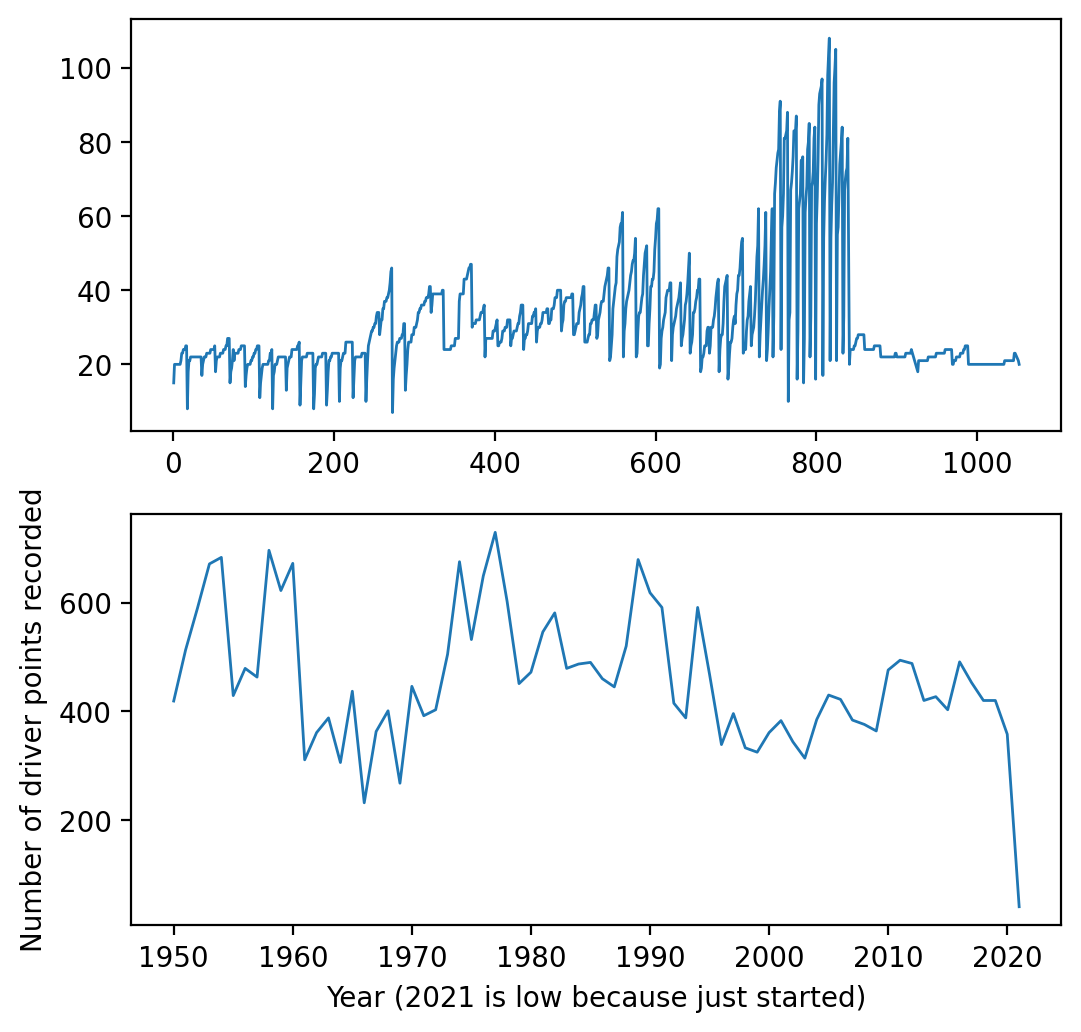

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(6,6))

drstandings_qual = driver_standings_df.groupby('raceId').agg('count')

ax[0].plot(drstandings_qual.index,drstandings_qual.iloc[:,0],lw=1)
ax[1].set_ylabel("Number of driver points recorded")
ax[1].set_xlabel("RaceId /!\ Race id is not linear in time")

drstandings_qual = drstandings_qual.join(races_df.set_index('raceId'),'raceId', how='left', lsuffix='_left', rsuffix='_right')
drstandings_qual = drstandings_qual.groupby('year').agg('sum')

ax[1].plot(drstandings_qual.index,drstandings_qual.iloc[:,0],lw=1)
ax[1].set_ylabel("Number of driver points recorded")
ax[1].set_xlabel("Year (2021 is low because just started)")

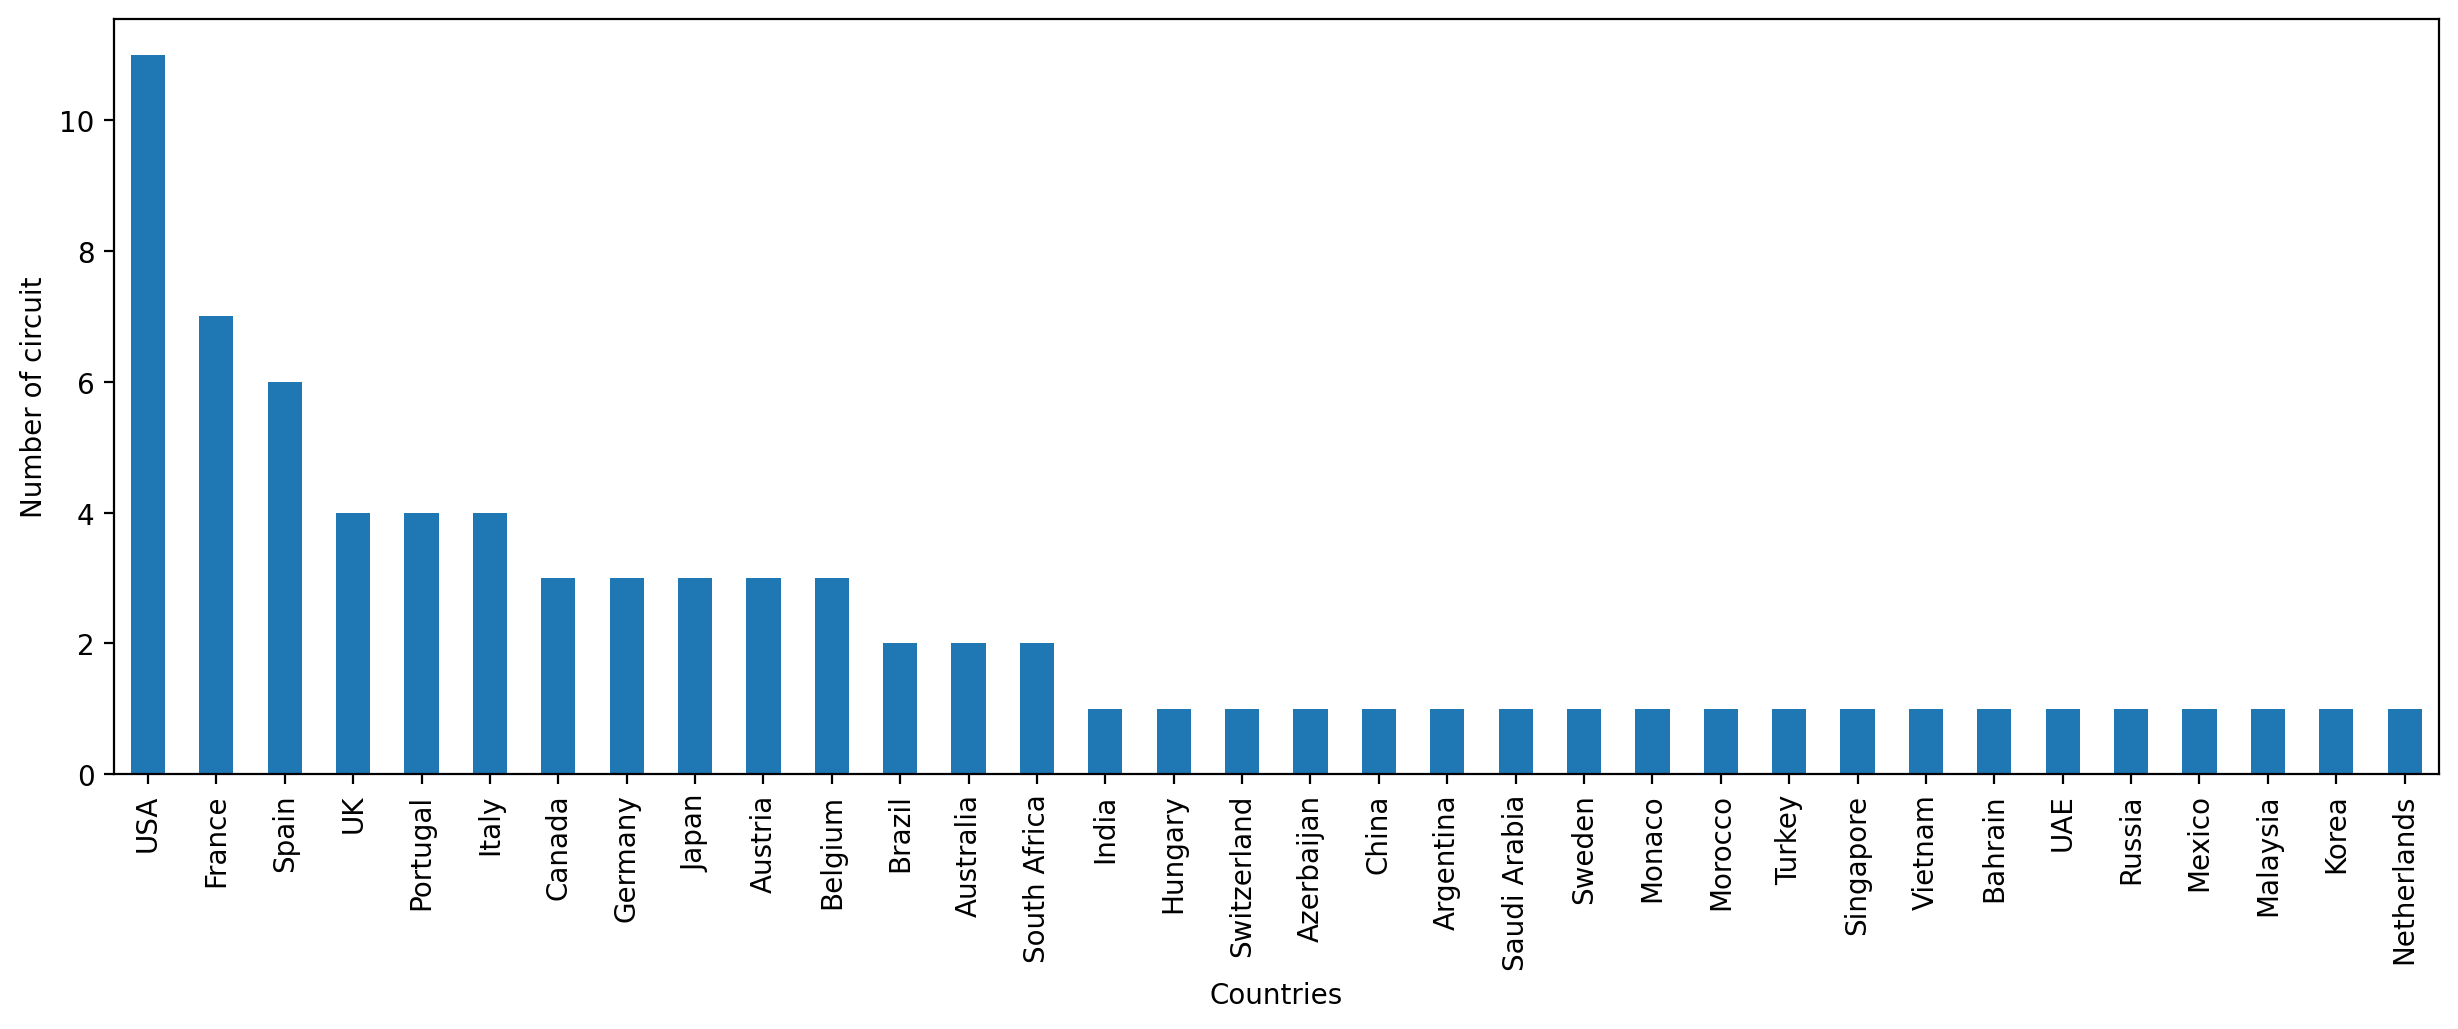

In [13]:
fig, ax = plt.subplots(figsize=(15,5))

circuits_df['country'].value_counts().plot.bar(ax=ax)

ax.set_xlabel("Countries")
ax.set_ylabel("Number of circuit");

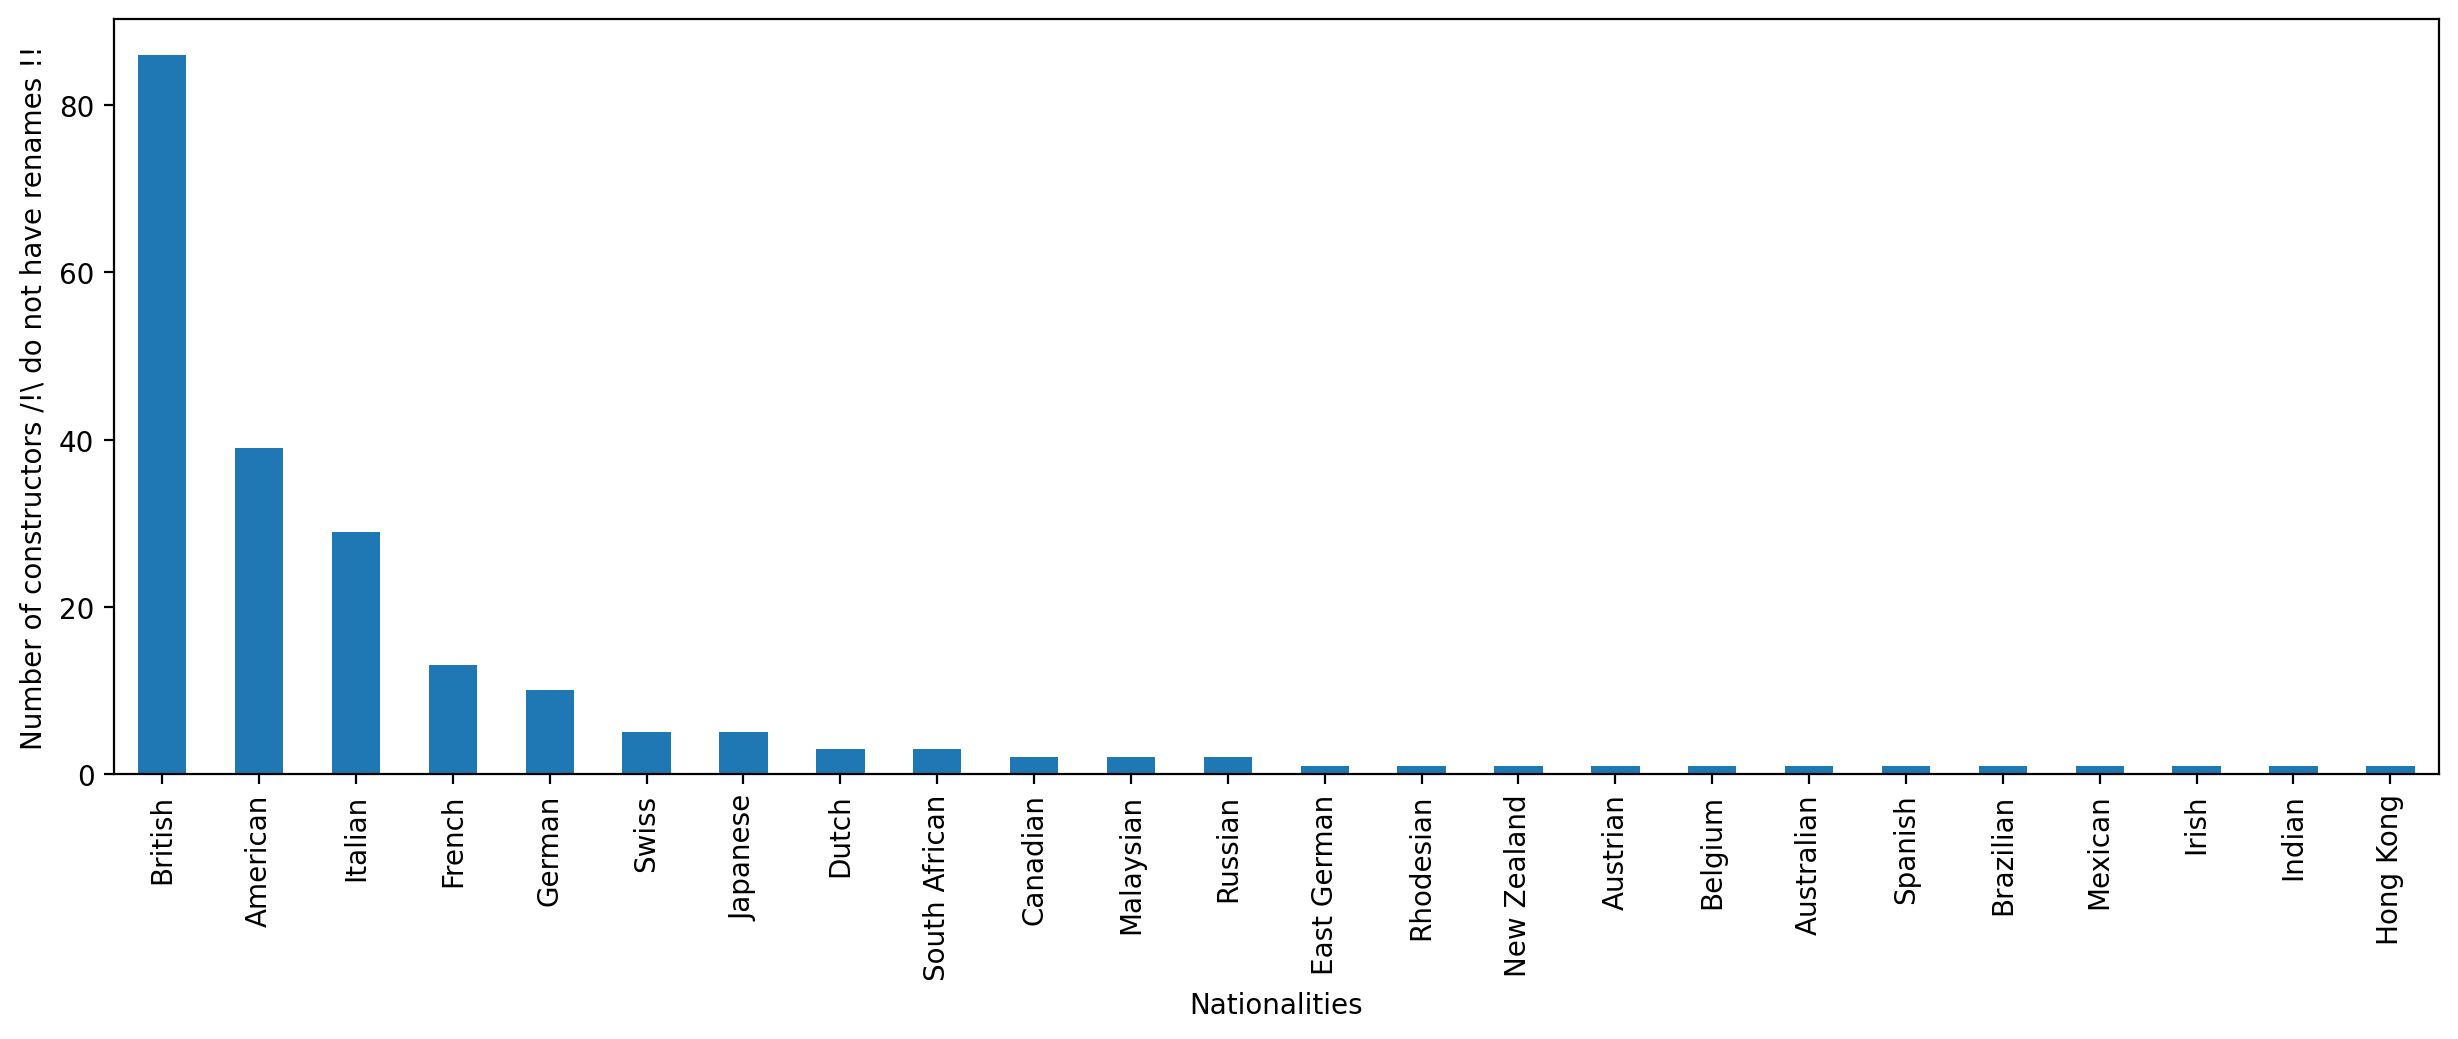

In [14]:
fig, ax = plt.subplots(figsize=(15,5))

constructors_df['nationality'].value_counts().plot.bar(ax=ax)

ax.set_xlabel("Nationalities")
ax.set_ylabel("Number of constructors /!\ do not have renames !!");

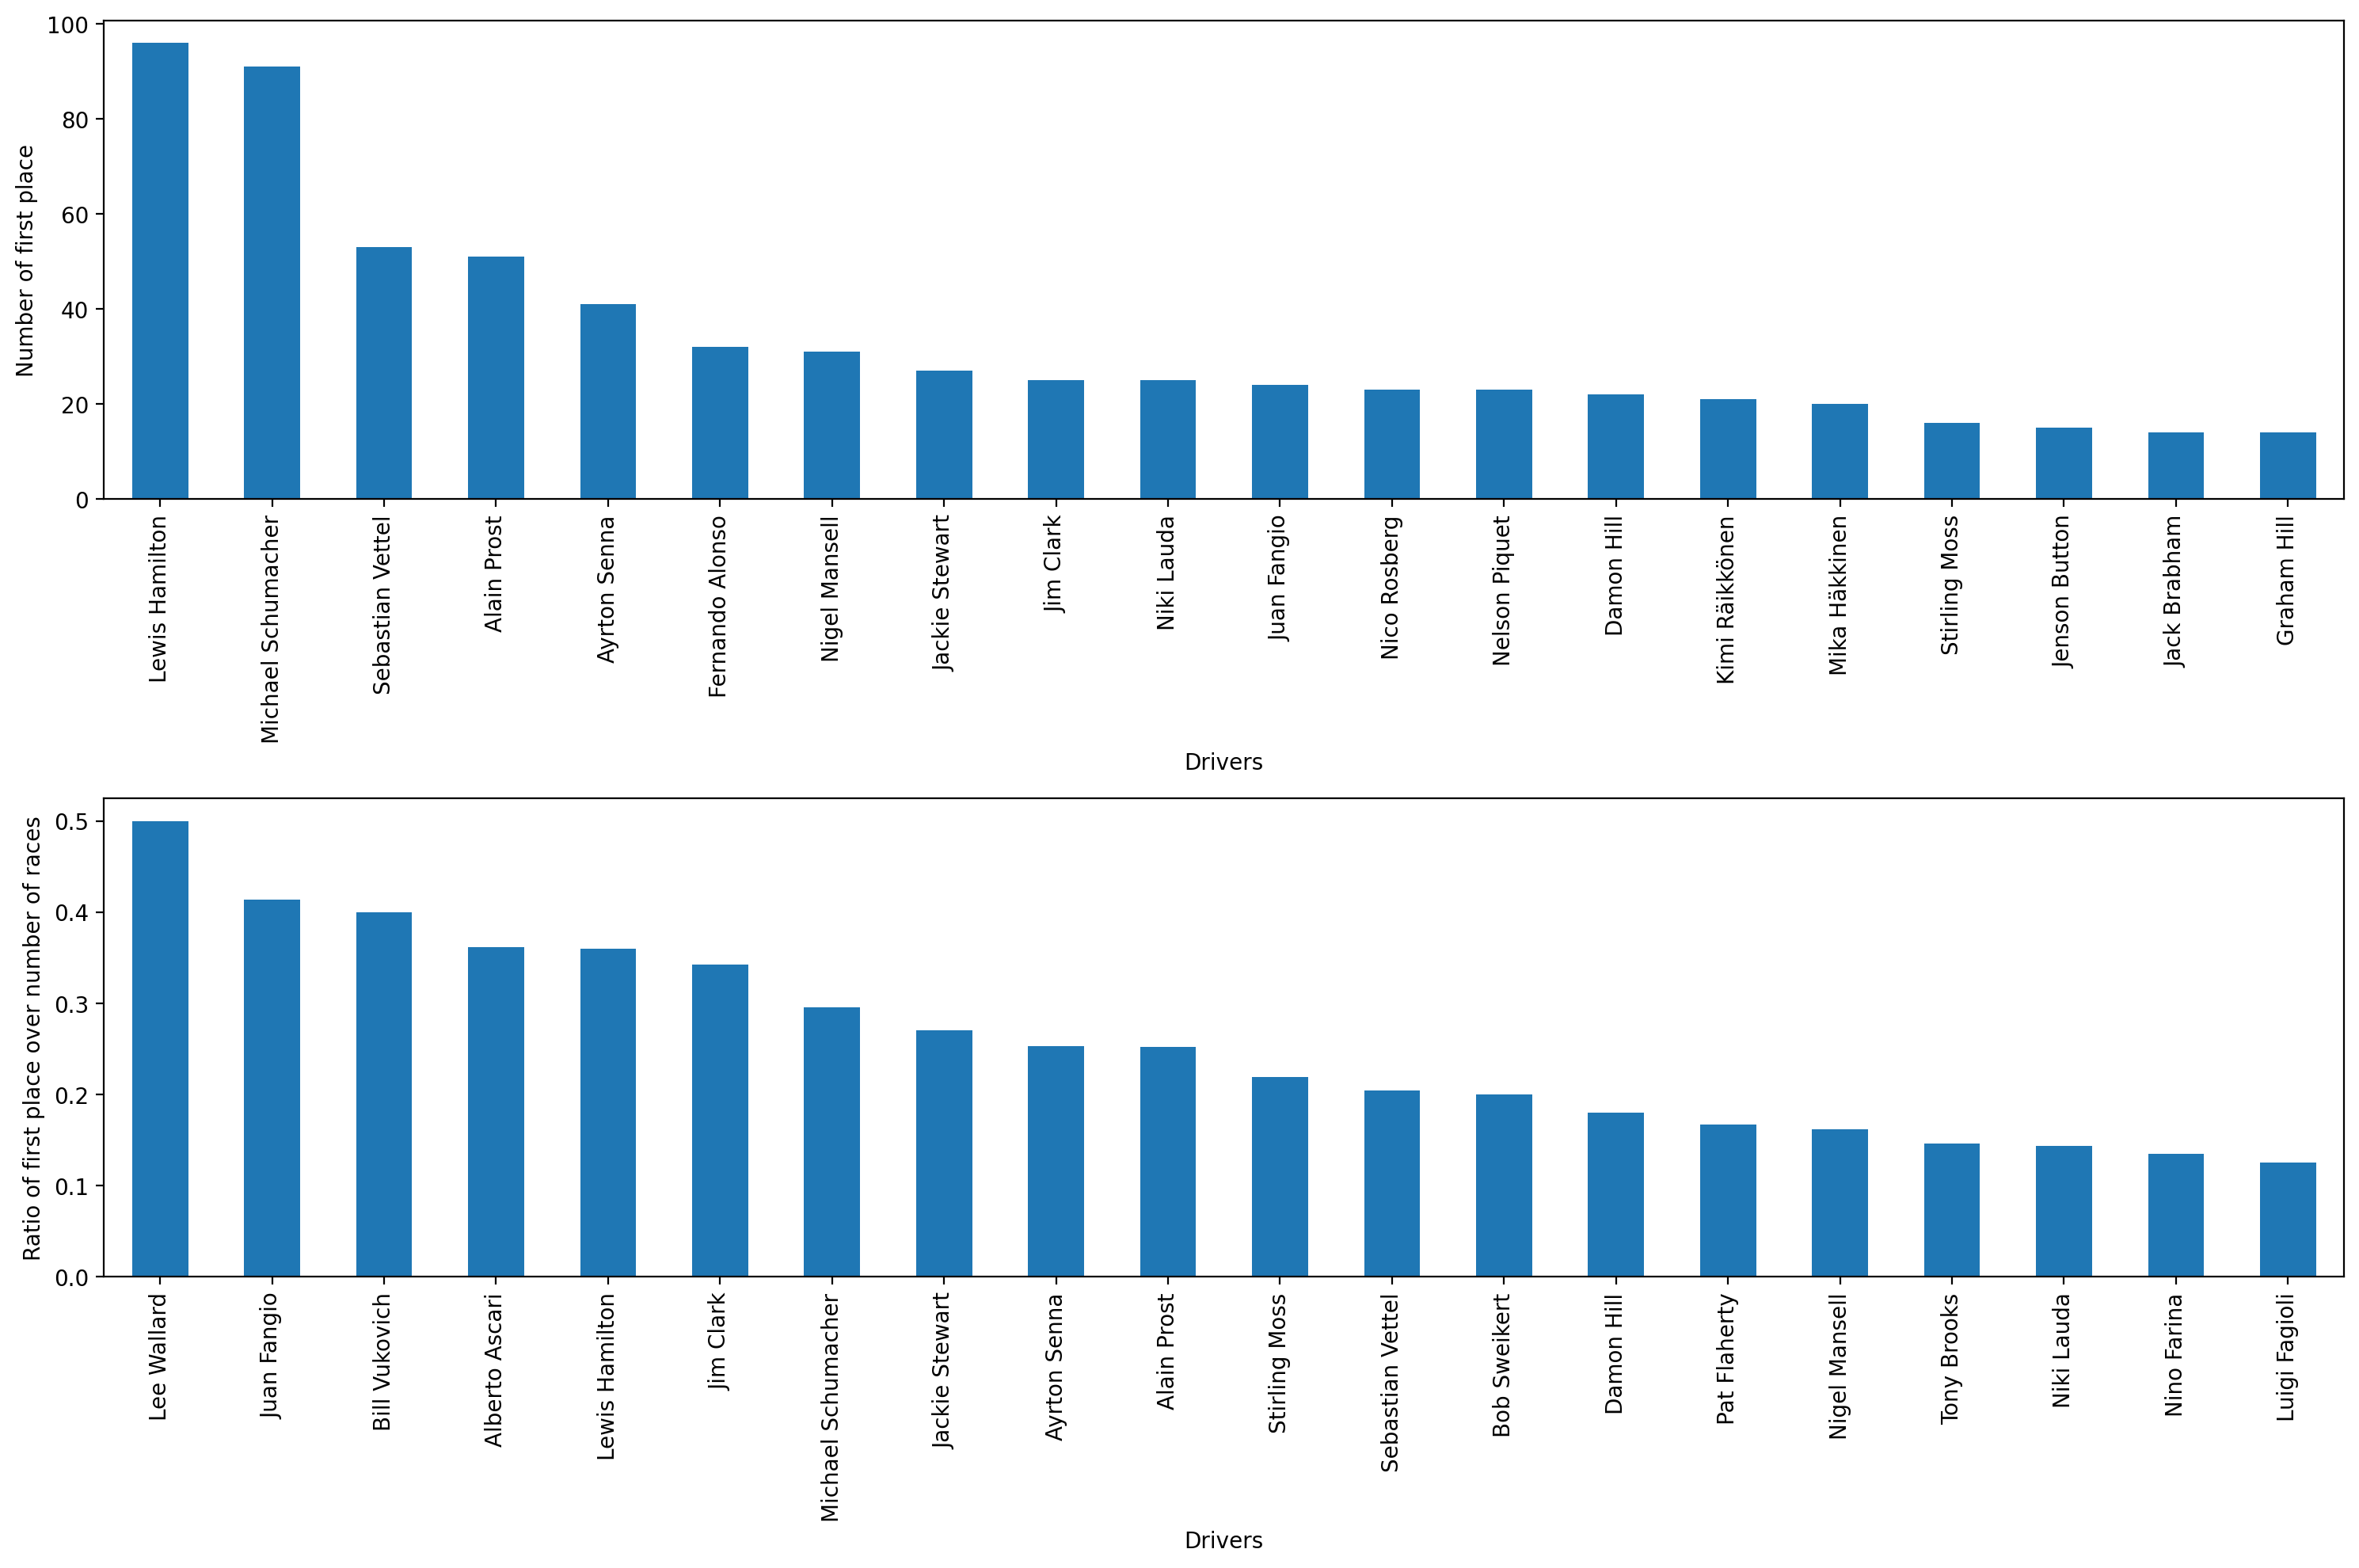

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))
t = results_df['driverId'][results_df['positionOrder']==1].value_counts()
t = t.rename('Nbfirstplace')
u = results_df['driverId'].value_counts()
drivers_df = drivers_df.merge(t,left_on='driverId',right_index=True)
t = t.rename('Ratiofr')
u = u.rename('Ratiofr')
drivers_df = drivers_df.merge(t/u,left_on='driverId',right_index=True)

drivers_df = drivers_df.set_index(drivers_df['forename'] +" "+ drivers_df['surname']).sort_values('Nbfirstplace',  ascending=False)
drivers_df['Nbfirstplace'].iloc[0:20].plot.bar(ax=ax[0])
ax[0].set_xlabel('Drivers')
ax[0].set_ylabel('Number of first place')

drivers_df = drivers_df.set_index(drivers_df['forename'] +" "+ drivers_df['surname']).sort_values('Ratiofr',  ascending=False)
drivers_df['Ratiofr'].iloc[0:20].plot.bar(ax=ax[1])
ax[1].set_xlabel('Drivers')
ax[1].set_ylabel('Ratio of first place over number of races')
plt.tight_layout()

In [16]:
# Check https://www.kaggle.com/jtrotman/f1-race-traces-2020
# https://www.kaggle.com/emiliebernard/evolution-of-circuit-formula-1-1950-2020